In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import sys
import os.path

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))
from dust import Dualgraph, rescalate
from dfsmatrix import dfsmatrix
from animSLE import animSLE

Los siguientes códigos fueron generados con la ayuda de IA

In [3]:
grafo = Dualgraph((10, 10))

f = grafo.graph.get_start()
print(f)
grafo.wilson()
s = grafo.path

[0, 2]


In [4]:
# count = 0
# arr = []
# for i in s:
#     for j in i:
#         arr.append(j)
#     arr.append(None)  # Marcador para separar listas
#     count += 1
# M = grafo.graph.grid

# m, n = M.shape
# fig, ax = plt.subplots()
# ax.set_xlim(-0.5, n-0.5)
# ax.set_ylim(-0.5, m-0.5)
# ax.set_xticks(np.arange(M.shape[0]))
# ax.set_yticks(np.arange(M.shape[1]))
# ax.grid(True)
# ax.set_title('Arbol generado por Wilson')

# # Punto inicial en rojo
# ax.plot(f[1], f[0], 'ro', label='Punto a')  # punto `a` en rojo

# # Lista para manejar las líneas acumuladas
# lines = []
# current_xdata, current_ydata = [], []

# def init():
#     return lines

# def update(frame):
#     global current_xdata, current_ydata
#     if arr[frame] is None:  # Detectar cambio de sublista
#         # Crear una nueva línea para la siguiente sublista
#         new_line, = ax.plot(current_ydata, current_xdata, color='blue', marker='o', linestyle='-', lw=2)
#         lines.append(new_line)  # Guardar la línea actual
#         current_xdata, current_ydata = [], []  # Reiniciar los datos
#     else:
#         x, y = arr[frame]
#         current_xdata.append(x)
#         current_ydata.append(y)

#         # Actualizar la línea actual en tiempo real
#         if len(lines) > 0:
#             lines[-1].set_data(current_ydata, current_xdata)
#         else:
#             line, = ax.plot(current_ydata, current_xdata, color='blue', marker='o', linestyle='-', lw=2)
#             lines.append(line)  # Crear la primera línea si no existe
#     return lines


# anim = FuncAnimation(fig,
#                      update,
#                      frames=len(arr),
#                      init_func=init,
#                      blit=True,  # Necesario para redibujar todo
#                      interval=500)

# HTML(anim.to_jshtml())


In [5]:
grafo.scalate()

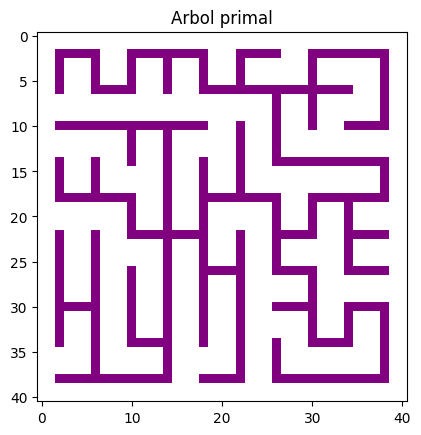

In [6]:
def custom_plot(matrix, title=None):
    # Create a custom colormap
    cmap = mcolors.ListedColormap(['white', 'purple', 'green'])
    bounds = [0, 1, 2, 3]
    norm = mcolors.BoundaryNorm(bounds, cmap.N)

    plt.imshow(matrix, cmap=cmap, norm=norm)
    # plt.colorbar(ticks=[0, 1, 2], format='%d')
    plt.title(title)
    plt.show()


grafo.gridact()
# print(grafo.grid)
custom_plot(grafo.grid, "Arbol primal")

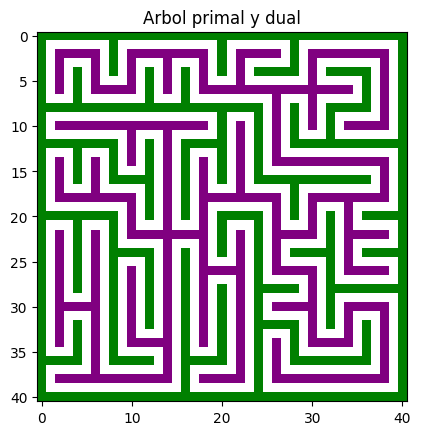

In [7]:
d = grafo.dual()

custom_plot(2*d + grafo.grid, "Arbol primal y dual")

In [8]:
p = dfsmatrix(d+grafo.grid)

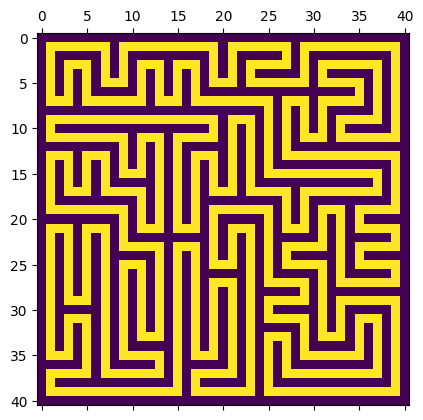

In [9]:
M2 = np.zeros(d.shape)
M2[p[:,0], p[:,1]] = 1
plt.matshow(M2)

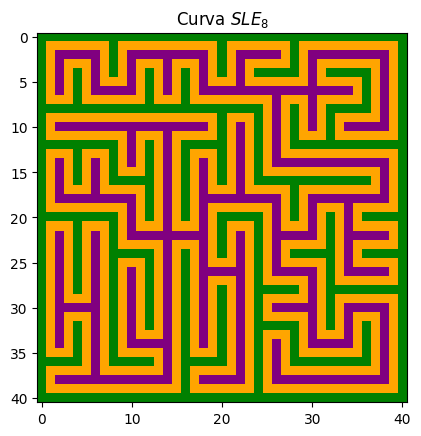

In [10]:
animSLE(grafo.grid, d, p)